Imports

In [1]:
import os, sys
sys.path.append('..')

from src.capture import LazyCapture
from src.labels import load_labels, l2i
from src.frames import remove_outside_petri
from src.augmentation import rotate_90_frame, rotate_90_label

from src.debug import print_frame

Load capture

In [2]:
# Load part 1
capture1 = LazyCapture.load('../data/pw1_A1_0315_part3.avi')
print(capture1)

LazyCapture[length = 12754; shape = (648, 686, 3)]


Load labels

In [3]:
# Load labels 1
labels1 = load_labels('../data/pw1_A1_0315_part3.txt')

Clean frames

In [4]:
# Compute center and radius
center = (capture1.W() // 2, capture1.H() // 2)
radius = (center[0] - 20, center[1] - 20)

# Cut zone outside petri dish
capture1.apply(remove_outside_petri(center, radius))

Print a sample

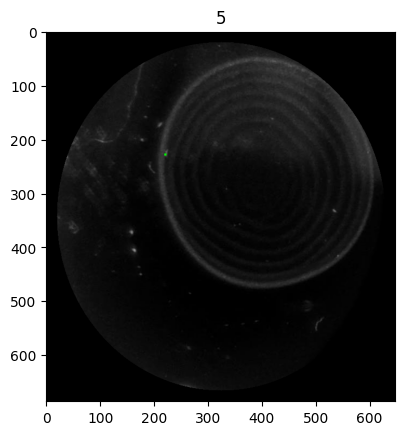

In [5]:
# Get frame nº5
frame_i, frame = capture1.frame(5, index=False)
label = l2i(labels1[frame_i])

# Print frame
print_frame()(frame_i, frame, (label, None))

Apply transformation

In [6]:
# Rotate frames 90 deg
capture1.apply(rotate_90_frame, shape=(capture1.H(), capture1.W(), capture1.C()))

Print a second sample

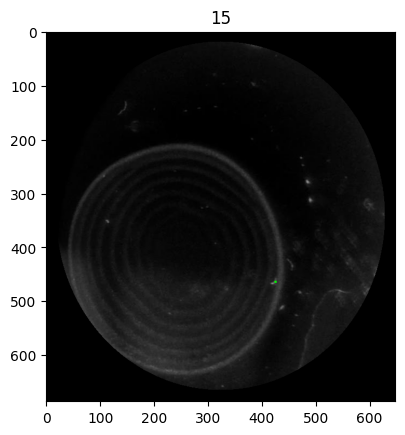

In [7]:
# Get frame nº15
frame_i, frame = capture1.frame(15, index=False)
label = rotate_90_label(15, l2i(labels1[frame_i]), (capture1.W(), capture1.H()))

# Print frame
print_frame()(frame_i, frame, (label, None))